In [11]:
import os, sys
import time

from pprint import pprint
from collections import defaultdict

import matplotlib.pyplot as plt

import bz2
import gzip
import zlib

In [49]:
sklearn_path = (
    "/home/nano/projects/tree-ensemble-model-management/models/sklearn/5days/100_trees"
)

xgboost_path = "/home/nano/projects/tree-ensemble-model-management/models/xgboost/5days"

In [39]:
def get_compression_ratios(model_folder, compression_func):
    model_files = os.listdir(model_folder)

    # Read all model binary strings
    model_binary_strings = []
    for model_file in model_files:
        with open(os.path.join(model_folder, model_file), "rb") as f:
            model_binary = f.read()
        model_binary_strings.append(model_binary)

    compression_ratios = {}
    # Iterate over all window sizes
    for window_size in range(1, len(model_files)):
        compression_ratios[window_size] = []
        # Step through models
        for start_idx in range(0, len(model_files), window_size):
            # Skip not-full chunks
            if start_idx + window_size >= len(model_files):
                continue

            # Concat Models into one big binary string
            model_str = b""
            for model_binary in model_binary_strings[
                start_idx : start_idx + window_size
            ]:
                model_str += model_binary

            # Compress
            compressed_model_str = compression_func(model_str)

            # Save statistics
            compression_ratios[window_size].append(
                len(model_str) / len(compressed_model_str)
            )

    for window_size, ratios in compression_ratios.items():
        compression_ratios[window_size] = sum(ratios) / len(ratios)

    return compression_ratios

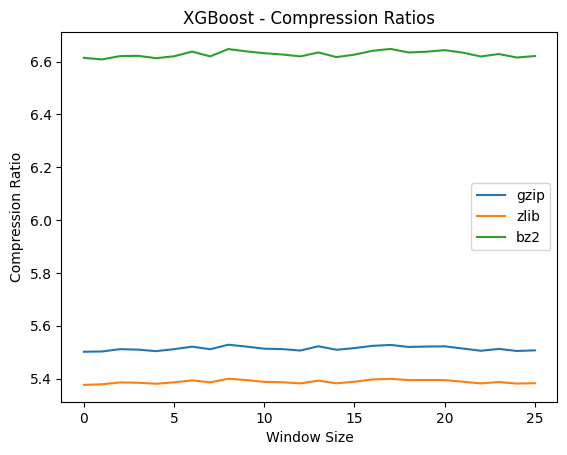

In [51]:
xgboost_gzip_ratios = get_compression_ratios(xgboost_path, gzip.compress)
xgboost_zlib_ratios = get_compression_ratios(xgboost_path, zlib.compress)
xgboost_bz2_ratios = get_compression_ratios(xgboost_path, bz2.compress)

plt.title("XGBoost - Compression Ratios")
plt.plot(xgboost_gzip_ratios.values(), label="gzip")
plt.plot(xgboost_zlib_ratios.values(), label="zlib")
plt.plot(xgboost_bz2_ratios.values(), label="bz2")
plt.xlabel("Window Size")
plt.ylabel("Compression Ratio")
plt.legend()